In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from dmba import regressionSummary, classificationSummary, liftChart, gainsChart
from sklearn.tree import DecisionTreeClassifier
from dmba import plotDecisionTree, gainsChart, liftChart
from dmba import classificationSummary, regressionSummary
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

# Data understanding

In [3]:
train_df.shape

(40500, 55)

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     40500 non-null  int64  
 1   avg_time_charging_lag1       40500 non-null  float64
 2   avg_time_charging_lag2       40500 non-null  float64
 3   avg_time_charging_lag3       40500 non-null  float64
 4   avg_time_charging_lag7       40434 non-null  float64
 5   charging_rate_lag3           40500 non-null  float64
 6   charging_rate_lag7           40488 non-null  float64
 7   avg_time_discharging_lag1    40500 non-null  float64
 8   avg_time_discharging_lag2    40500 non-null  float64
 9   avg_time_discharging_lag3    40500 non-null  float64
 10  avg_time_discharging_lag7    40434 non-null  float64
 11  discharging_rate_lag3        40500 non-null  float64
 12  discharging_rate_lag7        40488 non-null  float64
 13  fail_7          

There are null values in the dataframe.

In [5]:
train_df['fail_7'].value_counts()

0    31099
1     9401
Name: fail_7, dtype: int64

There are 40500 total rows in the train dataset. 31099 of them are predicted to be 0, which will not be fail in the next 7 days, 9401 are predicted to fail.

In [6]:
train_df.deviceid.nunique()

40500

All devices in the train dataset are unique

In [7]:
train_df=train_df.drop(columns='deviceid')

In [8]:
corr = train_df.corr().round(2)

In [9]:
corr

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,charging_rate_lag3,charging_rate_lag7,avg_time_discharging_lag1,avg_time_discharging_lag2,avg_time_discharging_lag3,avg_time_discharging_lag7,...,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
avg_time_charging_lag1,1.00,0.00,0.00,-0.01,0.01,-0.00,0.98,0.00,0.00,-0.01,...,-0.19,-0.01,-0.02,-0.07,-0.08,0.24,0.24,-0.09,-0.00,0.24
avg_time_charging_lag2,0.00,1.00,-0.01,-0.00,-0.00,-0.00,0.00,0.98,-0.01,0.00,...,-0.19,-0.01,-0.01,-0.07,-0.09,0.24,0.24,-0.09,0.01,0.24
avg_time_charging_lag3,0.00,-0.01,1.00,-0.01,-0.00,-0.00,0.00,-0.01,0.98,-0.01,...,-0.20,-0.01,-0.00,-0.07,-0.08,0.24,0.24,-0.09,0.01,0.24
avg_time_charging_lag7,-0.01,-0.00,-0.01,1.00,-0.00,-0.00,-0.01,0.00,-0.00,0.98,...,-0.19,-0.01,-0.02,-0.07,-0.08,0.23,0.23,-0.09,-0.00,0.23
charging_rate_lag3,0.01,-0.00,-0.00,-0.00,1.00,0.01,0.01,-0.00,-0.00,-0.00,...,0.00,0.00,-0.00,0.01,0.01,0.01,0.00,0.00,-0.00,0.00
charging_rate_lag7,-0.00,-0.00,-0.00,-0.00,0.01,1.00,-0.00,-0.00,-0.00,-0.00,...,-0.00,-0.00,0.01,0.01,0.01,0.01,0.00,-0.00,-0.01,0.01
avg_time_discharging_lag1,0.98,0.00,0.00,-0.01,0.01,-0.00,1.00,0.00,0.00,-0.01,...,-0.19,-0.01,-0.02,-0.06,-0.08,0.24,0.24,-0.08,-0.00,0.24
avg_time_discharging_lag2,0.00,0.98,-0.01,0.00,-0.00,-0.00,0.00,1.00,-0.01,0.00,...,-0.20,-0.00,-0.00,-0.07,-0.09,0.24,0.24,-0.09,0.01,0.24
avg_time_discharging_lag3,0.00,-0.01,0.98,-0.00,-0.00,-0.00,0.00,-0.01,1.00,-0.01,...,-0.20,-0.01,0.00,-0.07,-0.08,0.24,0.24,-0.09,0.01,0.24
avg_time_discharging_lag7,-0.01,0.00,-0.01,0.98,-0.00,-0.00,-0.01,0.00,-0.01,1.00,...,-0.19,-0.01,-0.02,-0.07,-0.08,0.23,0.23,-0.09,-0.00,0.23


<AxesSubplot:>

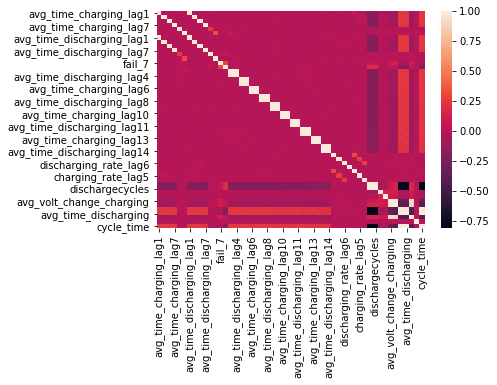

In [10]:
sns.heatmap(corr)

In [11]:
avg_time_charging_list=train_df.columns[[x.startswith("avg_time_charging") for x in train_df.columns]]
avg_time_discharging_list=train_df.columns[[x.startswith("avg_time_discharging") for x in train_df.columns]]

In [12]:
avg_time_charging_df=train_df[avg_time_charging_list]
avg_time_discharging_df=train_df[avg_time_discharging_list]

In [13]:
corr_matrix = avg_time_charging_df.corr().round(2)
corr_matrix

,avg_time_charging_lag1,avg_time_charging_lag2,avg_time_charging_lag3,avg_time_charging_lag7,avg_time_charging_lag4,avg_time_charging_lag5,avg_time_charging_lag6,avg_time_charging_lag8,avg_time_charging_lag9,avg_time_charging_lag10,avg_time_charging_lag11,avg_time_charging_lag12,avg_time_charging_lag13,avg_time_charging_lag14,avg_time_charging
avg_time_charging_lag1,1.00,0.00,0.00,-0.01,0.00,-0.01,-0.01,-0.00,-0.00,0.00,-0.00,-0.01,-0.01,0.01,0.24
avg_time_charging_lag2,0.00,1.00,-0.01,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,-0.01,-0.00,0.24
avg_time_charging_lag3,0.00,-0.01,1.00,-0.01,0.00,0.00,-0.01,0.00,0.01,-0.00,0.00,-0.00,0.00,-0.00,0.24
avg_time_charging_lag7,-0.01,-0.00,-0.01,1.00,-0.00,-0.00,0.01,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.01,0.23
avg_time_charging_lag4,0.00,-0.00,0.00,-0.00,1.00,-0.00,0.00,-0.01,0.01,-0.00,-0.00,0.01,0.01,-0.00,0.24
avg_time_charging_lag5,-0.01,0.00,0.00,-0.00,-0.00,1.00,-0.00,-0.00,-0.00,-0.00,0.00,0.01,-0.00,0.00,0.24
avg_time_charging_lag6,-0.01,-0.00,-0.01,0.01,0.00,-0.00,1.00,0.01,-0.01,-0.00,0.00,-0.00,0.00,-0.01,0.24
avg_time_charging_lag8,-0.00,-0.00,0.00,0.00,-0.01,-0.00,0.01,1.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.24
avg_time_charging_lag9,-0.00,0.00,0.01,-0.00,0.01,-0.00,-0.01,0.00,1.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.23
avg_time_charging_lag10,0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,1.00,0.00,-0.00,0.00,0.01,0.23


In [14]:
avg_time_charging_nonnull_df=avg_time_charging_df.dropna()

In [15]:
X=avg_time_charging_nonnull_df.drop(columns='avg_time_charging')
Y=avg_time_charging_nonnull_df['avg_time_charging']
charging_time_lm = LinearRegression()
charging_time_lm.fit(X,Y)

coeff_df = pd.DataFrame(charging_time_lm.coef_,X.columns,columns=['Coefficient'])
print(charging_time_lm.intercept_)
print(coeff_df)


4.558011038082682
                         Coefficient
avg_time_charging_lag1      0.051952
avg_time_charging_lag2      0.051150
avg_time_charging_lag3      0.052383
avg_time_charging_lag7      0.051130
avg_time_charging_lag4      0.052203
avg_time_charging_lag5      0.051723
avg_time_charging_lag6      0.051081
avg_time_charging_lag8      0.051940
avg_time_charging_lag9      0.049973
avg_time_charging_lag10     0.051318
avg_time_charging_lag11     0.050977
avg_time_charging_lag12     0.051246
avg_time_charging_lag13     0.051315
avg_time_charging_lag14     0.051509


In [16]:
print('MAE:', metrics.mean_absolute_error(Y, charging_time_lm.predict(X)))
print('MSE:', metrics.mean_squared_error(Y, charging_time_lm.predict(X)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y, charging_time_lm.predict(X))))

MAE: 1.4113286240956082
MSE: 3.1101393880136916
RMSE: 1.7635587282576364


In [17]:
avg_time_discharging_nonnull_df=avg_time_discharging_df.dropna()

In [18]:
x=avg_time_discharging_nonnull_df.drop(columns='avg_time_discharging')
y=avg_time_discharging_nonnull_df['avg_time_discharging']
discharging_time_lm = LinearRegression()
discharging_time_lm.fit(x,y)

coeff_df2 = pd.DataFrame(discharging_time_lm.coef_,x.columns,columns=['Coefficient'])
print(discharging_time_lm.intercept_)
print(coeff_df2)

7.243227689553137
                            Coefficient
avg_time_discharging_lag1      0.052254
avg_time_discharging_lag2      0.051165
avg_time_discharging_lag3      0.052670
avg_time_discharging_lag7      0.051401
avg_time_discharging_lag4      0.052343
avg_time_discharging_lag5      0.051930
avg_time_discharging_lag6      0.051110
avg_time_discharging_lag8      0.051395
avg_time_discharging_lag9      0.050188
avg_time_discharging_lag10     0.051411
avg_time_discharging_lag11     0.050901
avg_time_discharging_lag12     0.051265
avg_time_discharging_lag13     0.051166
avg_time_discharging_lag14     0.051519


#### Variables avg_time_charging relationship with avg_time_charging_lag fits a linear regression model, same rule applied to avg_time_discharging and avg_time_discharging_lag
avg_time_charging=4.56+0.05*avg_time_charging_lag1+0.05*avg_time_charging_lag2+...+0.05*avg_time_charging_lag14
avg_time_discharging=7.24+0.05*avg_time_discharging_lag1+0.05*avg_time_discharging_lag2+...0.05*avg_time_discharging_lag14

So we decided to drop avg_time_charging(discharging)_lag(s)

In [19]:
train_df1=train_df.drop(columns=x.columns)
train_df1=train_df1.drop(columns=X.columns)

In [20]:
train_df1.head()

,charging_rate_lag3,charging_rate_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,charge_cycle_time_below_12,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,...,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time,LastRecord,Date Deployed
0,0.086667,-0.006667,-1.163333,0.033333,0,False,-0.360000,1.573333,0.816667,-0.173333,...,2.375000,377.080000,367.428750,21.696250,39.005000,4174.875000,14.200000,60.701250,4/1/2021,10/6/2019
1,0.136667,-1.296667,-0.066667,-2.653333,0,False,-4.593333,0.450000,-3.063333,-0.103333,...,1.000000,350.517857,350.309286,19.883571,32.213571,4161.000000,19.777778,52.097143,4/1/2021,10/27/2019
2,-0.460000,-0.083333,-2.643333,0.686667,0,False,-0.050000,0.240000,0.000000,0.216667,...,4.095238,346.113333,343.409524,13.675238,20.471429,4152.238095,19.200000,34.146667,4/1/2021,10/31/2019
3,0.076667,-0.006667,-0.166667,0.033333,0,False,0.013333,0.406667,-0.293333,-0.046667,...,0.736842,356.184211,349.844737,16.306842,26.189474,4164.631579,23.625000,42.496316,4/1/2021,10/1/2019
4,0.040000,-0.153333,0.066667,-1.030000,0,True,-0.353333,0.983333,-0.006667,-1.790000,...,1.133333,370.904000,367.730000,18.797333,30.812000,4169.800000,12.666667,49.609333,4/1/2021,9/13/2019


In [21]:
corr2 = train_df1.corr().round(2)
corr2

,charging_rate_lag3,charging_rate_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,charge_cycle_time_below_12,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,...,dischargecycles,total_off_time,number_times_restart,avg_volt_change_charging,avg_volt_change_discharging,avg_time_charging,avg_time_discharging,max_voltage_day,piececount,cycle_time
charging_rate_lag3,1.00,0.01,0.25,-0.00,0.03,0.03,-0.01,-0.00,-0.01,0.00,...,0.00,0.00,-0.00,0.01,0.01,0.01,0.00,0.00,-0.00,0.00
charging_rate_lag7,0.01,1.00,-0.00,0.32,-0.00,-0.00,0.01,-0.01,0.02,0.00,...,-0.00,-0.00,0.01,0.01,0.01,0.01,0.00,-0.00,-0.01,0.01
discharging_rate_lag3,0.25,-0.00,1.00,0.00,0.04,0.05,-0.00,0.00,-0.00,-0.00,...,0.01,-0.01,-0.00,0.03,0.03,-0.02,-0.00,0.02,-0.00,-0.01
discharging_rate_lag7,-0.00,0.32,0.00,1.00,-0.01,-0.01,0.00,0.01,0.01,-0.01,...,0.01,-0.01,0.00,0.02,0.02,-0.01,0.01,0.01,-0.01,0.00
fail_7,0.03,-0.00,0.04,-0.01,1.00,0.29,0.01,0.00,0.00,0.00,...,0.06,0.01,0.02,0.12,0.12,-0.06,-0.06,0.11,0.01,-0.06
charge_cycle_time_below_12,0.03,-0.00,0.05,-0.01,0.29,1.00,-0.00,-0.00,-0.00,-0.00,...,0.20,-0.00,0.00,0.05,0.06,-0.19,-0.19,0.06,0.01,-0.19
discharging_rate_lag4,-0.01,0.01,-0.00,0.00,0.01,-0.00,1.00,-0.00,-0.00,0.00,...,0.01,-0.01,0.00,0.02,0.02,-0.01,-0.00,0.02,-0.00,-0.01
discharging_rate_lag5,-0.00,-0.01,0.00,0.01,0.00,-0.00,-0.00,1.00,0.01,-0.01,...,0.00,-0.00,0.01,0.02,0.02,-0.01,0.01,0.01,-0.01,0.00
discharging_rate_lag6,-0.01,0.02,-0.00,0.01,0.00,-0.00,-0.00,0.01,1.00,0.00,...,0.00,-0.01,0.00,0.01,0.02,-0.00,0.01,0.01,-0.01,0.01
discharging_rate_lag8,0.00,0.00,-0.00,-0.01,0.00,-0.00,0.00,-0.01,0.00,1.00,...,0.00,-0.01,-0.00,0.03,0.03,-0.01,0.01,0.02,-0.01,0.00


#### Because cycle_time has a almost 1 correlation with avg_time_charging and avg_time_discharging, we decided to only keep cycle_time
#### max_voltage_day also has a high correlation with avg_volt_change_charging/discharging, we will only keeping the max_voltage_day
#### chargecycles and dischargecycles are also highly correlated to each other, we will drop the dischargecycle

In [22]:
train_df1=train_df1.drop(columns=['avg_time_charging','avg_time_discharging','avg_volt_change_charging','avg_volt_change_discharging','dischargecycles'])

In [23]:
train_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   charging_rate_lag3          40500 non-null  float64
 1   charging_rate_lag7          40488 non-null  float64
 2   discharging_rate_lag3       40500 non-null  float64
 3   discharging_rate_lag7       40488 non-null  float64
 4   fail_7                      40500 non-null  int64  
 5   charge_cycle_time_below_12  40500 non-null  bool   
 6   discharging_rate_lag4       40500 non-null  float64
 7   discharging_rate_lag5       40500 non-null  float64
 8   discharging_rate_lag6       40498 non-null  float64
 9   discharging_rate_lag8       40469 non-null  float64
 10  charging_rate_lag4          40500 non-null  float64
 11  charging_rate_lag5          40500 non-null  float64
 12  charging_rate_lag6          40498 non-null  float64
 13  chargecycles                405

#### Since null values in the resulted dataframe is low, we will drop the rows with null values.

In [24]:
train_df1=train_df1.dropna()

In [25]:
train_df1.shape
#only 31 rows are eliminated from the dataframe

(40469, 21)

In [26]:
#Construct a new column 'working_days' calculated from the difference of the LastRecord and Date Deployed column, then drop
#these two columns
train_df1['LastRecord']=pd.to_datetime(train_df1['LastRecord'])
train_df1['Date Deployed']=pd.to_datetime(train_df1['Date Deployed'])
train_df1['working_days']=train_df1['LastRecord']-train_df1['Date Deployed']
train_df1['working_days']=train_df1['working_days'].dt.days

In [27]:
train_df1=train_df1.drop(columns=['LastRecord','Date Deployed'])

In [28]:
train_df1

,charging_rate_lag3,charging_rate_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,charge_cycle_time_below_12,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,total_off_time,number_times_restart,max_voltage_day,piececount,cycle_time,working_days
0,0.086667,-0.006667,-1.163333,0.033333,0,False,-0.360000,1.573333,0.816667,-0.173333,-0.070000,-1.603333,-0.166667,50.250000,49.000000,2.375000,4174.875000,14.200000,60.701250,543
1,0.136667,-1.296667,-0.066667,-2.653333,0,False,-4.593333,0.450000,-3.063333,-0.103333,0.216667,0.000000,-1.010000,56.285714,36.857143,1.000000,4161.000000,19.777778,52.097143,522
2,-0.460000,-0.083333,-2.643333,0.686667,0,False,-0.050000,0.240000,0.000000,0.216667,-0.026667,0.000000,-0.013333,80.380952,2.333333,4.095238,4152.238095,19.200000,34.146667,518
3,0.076667,-0.006667,-0.166667,0.033333,0,False,0.013333,0.406667,-0.293333,-0.046667,-0.030000,0.460000,1.340000,91.736842,10.789474,0.736842,4164.631579,23.625000,42.496316,548
4,0.040000,-0.153333,0.066667,-1.030000,0,True,-0.353333,0.983333,-0.006667,-1.790000,0.016667,1.606667,0.013333,71.066667,14.266667,1.133333,4169.800000,12.666667,49.609333,566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40495,-0.083333,-0.033333,-0.160000,1.233333,1,True,0.236667,-0.050000,-0.026667,0.060000,-0.143333,0.086667,-0.013333,83.434783,17.739130,2.782609,4162.913043,70.181818,36.957826,574
40496,0.016667,-0.900000,0.533333,-0.180000,1,True,0.063333,0.053333,-0.540000,0.450000,0.016667,-0.050000,-0.093333,64.866667,0.266667,1.066667,4181.600000,11.888889,46.168667,561
40497,-0.020000,1.706667,0.006667,-0.546667,1,True,-0.010000,-0.010000,-0.006667,-3.506667,0.000000,0.010000,0.040000,84.727273,6.727273,2.227273,4157.045455,26.400000,47.638182,531
40498,-0.103333,0.526667,0.036667,-0.256667,0,True,0.016667,0.026667,0.203333,0.040000,-0.006667,0.170000,-0.010000,94.100000,24.050000,6.750000,4171.650000,17.714286,37.451000,547


<AxesSubplot:>

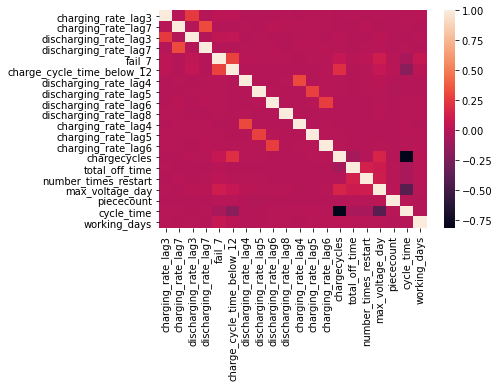

In [29]:
corr3 = train_df1.corr()
sns.heatmap(corr3)

In [30]:
corr3

,charging_rate_lag3,charging_rate_lag7,discharging_rate_lag3,discharging_rate_lag7,fail_7,charge_cycle_time_below_12,discharging_rate_lag4,discharging_rate_lag5,discharging_rate_lag6,discharging_rate_lag8,charging_rate_lag4,charging_rate_lag5,charging_rate_lag6,chargecycles,total_off_time,number_times_restart,max_voltage_day,piececount,cycle_time,working_days
charging_rate_lag3,1.000000,0.005461,0.250783,-0.002585,0.025477,0.025408,-0.011498,-0.001314,-0.007001,0.004507,-0.004224,0.003383,0.003347,0.000015,0.001610,-0.001096,0.002750,-0.000801,0.003974,0.004765
charging_rate_lag7,0.005461,1.000000,-0.003268,0.317123,-0.004739,-0.000475,0.007334,-0.004883,0.017066,0.002033,0.012249,0.004754,0.007598,-0.000165,-0.003713,0.009459,-0.000883,-0.004912,0.006090,-0.004989
discharging_rate_lag3,0.250783,-0.003268,1.000000,0.000558,0.041949,0.046661,-0.003253,0.003410,-0.004670,-0.002875,0.002544,0.004505,-0.000180,0.014713,-0.005123,-0.001940,0.021232,-0.000500,-0.008277,0.002289
discharging_rate_lag7,-0.002585,0.317123,0.000558,1.000000,-0.006040,-0.009220,0.002073,0.007694,0.008654,-0.008253,0.014137,0.009688,0.009196,0.007078,-0.006766,0.001598,0.011201,-0.010038,0.002523,0.001123
fail_7,0.025477,-0.004739,0.041949,-0.006040,1.000000,0.289378,0.010711,0.003865,0.002100,0.004027,-0.001804,0.006064,0.003670,0.058519,0.009156,0.022956,0.105758,0.007467,-0.058287,0.070605
charge_cycle_time_below_12,0.025408,-0.000475,0.046661,-0.009220,0.289378,1.000000,-0.000318,-0.003293,-0.002642,-0.003443,-0.002698,-0.000298,0.004119,0.202179,-0.001399,0.004320,0.058244,0.009542,-0.186398,0.019196
discharging_rate_lag4,-0.011498,0.007334,-0.003253,0.002073,0.010711,-0.000318,1.000000,-0.000155,-0.001881,0.004106,0.309572,-0.003020,0.004469,0.007092,-0.011436,0.001290,0.020642,-0.003496,-0.005848,0.000197
discharging_rate_lag5,-0.001314,-0.004883,0.003410,0.007694,0.003865,-0.003293,-0.000155,1.000000,0.006391,-0.007134,-0.000480,0.283509,0.006321,0.003579,-0.000159,0.007439,0.012073,-0.013840,0.000954,-0.001050
discharging_rate_lag6,-0.007001,0.017066,-0.004670,0.008654,0.002100,-0.002642,-0.001881,0.006391,1.000000,0.000874,-0.000712,0.005358,0.263348,0.001259,-0.008328,0.001246,0.006273,-0.012204,0.006312,0.004252
discharging_rate_lag8,0.004507,0.002033,-0.002875,-0.008253,0.004027,-0.003443,0.004106,-0.007134,0.000874,1.000000,-0.002669,-0.001495,-0.005439,-0.000060,-0.012195,-0.000450,0.015372,-0.007646,0.001468,0.001745


#### Although chargecycles has a relatively high correlation with cycle_time, since we set the threshole to be 0.85, we decided not to drop it for now.
#### Normally we also need to see if there are outliers, but we decided not to filter out outliers because those values might be some indicator of machine malfunction.

Text(0.5, 1.0, 'Relationship between working_days and charge_cycle_time_below_12')

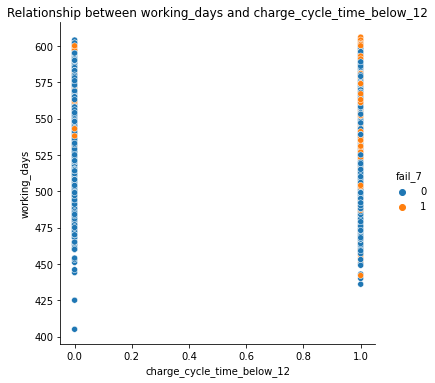

In [31]:
sns.relplot(kind='scatter',data=train_df1,x='charge_cycle_time_below_12',y='working_days',hue='fail_7')
plt.title('Relationship between working_days and charge_cycle_time_below_12')

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Text(0.5, 1.0, 'Count plot of charge_cycle_time_below_12')

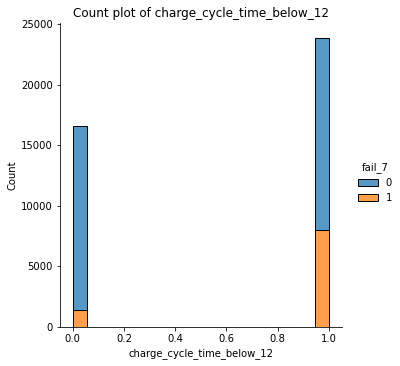

In [32]:
sns.displot(train_df1, x='charge_cycle_time_below_12', hue='fail_7', multiple='stack')
plt.title('Count plot of charge_cycle_time_below_12')

#### We tried to graph the relationships between variables that we think it might affect the outcome most. From the count plot above, we can see that if charge_cycle_time_below_12 is True, then the proportion of machine will fail in the next 7 days goes up. 

# Modeling

In [33]:
predictors=train_df1.drop(columns='fail_7')
X = pd.get_dummies(predictors)
y = train_df1['fail_7']

# split into training and validation
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

#### Due to time limit, we use holdout method to train and test our model.

## Decision Tree

In [34]:
dt = DecisionTreeClassifier(max_depth = 3)#try increasing the depth and see how it affects the performance (accuracy, precision, recall, f-measure below)
dt.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=3)

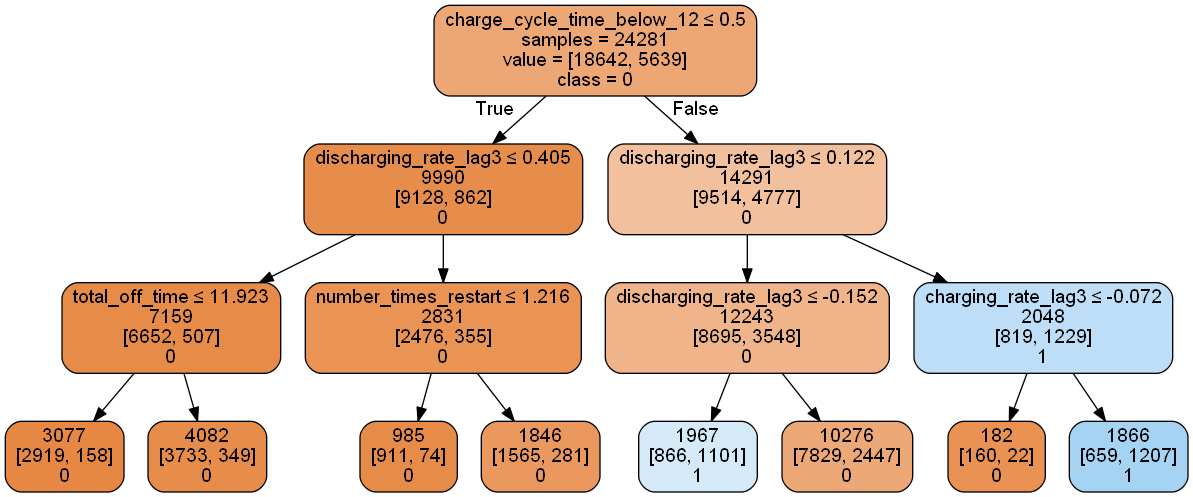

In [35]:
plotDecisionTree(dt, feature_names=train_X.columns, class_names=dt.classes_)

In [36]:
#training set
print("Accuracy:",accuracy_score(train_y, dt.predict(train_X)))
print("precision score: ", precision_score(train_y, dt.predict(train_X)))
print("recall score: ", recall_score(train_y, dt.predict(train_X)))
print("f1-score: ", f1_score(train_y, dt.predict(train_X)))

Accuracy: 0.8000082368930439
precision score:  0.6021393164623011
recall score:  0.4092924277354141
f1-score:  0.48733108108108114


In [37]:
#test set
print("Accuracy:",accuracy_score(valid_y, dt.predict(valid_X)))
print("precision score: ", precision_score(valid_y, dt.predict(valid_X)))
print("recall score: ", recall_score(valid_y, dt.predict(valid_X)))
print("f1-score: ", f1_score(valid_y, dt.predict(valid_X)))

Accuracy: 0.7941685198912775
precision score:  0.5840882237101221
recall score:  0.3945198191008247
f1-score:  0.47094315655763735


## Logistic Regression

In [38]:
logit = LogisticRegression(penalty="l2", solver='liblinear')
logit.fit(train_X, train_y)

LogisticRegression(solver='liblinear')

In [39]:
print('intercept ', logit.intercept_[0])
print(pd.DataFrame({'coefficient': logit.coef_[0]}, index=train_X.columns).sort_values('coefficient',ascending=False))
print()

intercept  -0.008354373129141463
                            coefficient
charge_cycle_time_below_12     1.645218
charging_rate_lag3             0.090243
discharging_rate_lag3          0.083295
discharging_rate_lag4          0.037981
number_times_restart           0.023365
working_days                   0.007016
discharging_rate_lag5          0.006441
discharging_rate_lag6          0.006241
charging_rate_lag5             0.003357
discharging_rate_lag8          0.002604
piececount                     0.000252
total_off_time                 0.000076
chargecycles                  -0.001244
max_voltage_day               -0.001437
cycle_time                    -0.003893
discharging_rate_lag7         -0.007333
charging_rate_lag6            -0.010884
charging_rate_lag7            -0.013226
charging_rate_lag4            -0.019566



In [40]:
print("Accuracy:",accuracy_score(train_y, logit.predict(train_X)))
print("precision score: ", precision_score(train_y, logit.predict(train_X)))
print("recall score: ", recall_score(train_y, logit.predict(train_X)))
print("f1-score: ", f1_score(train_y, logit.predict(train_X)))

Accuracy: 0.7677196161607841
precision score:  0.4
recall score:  0.0003546728143287817
f1-score:  0.0007087172218284905


## Naive Bayes

In [41]:
nb = GaussianNB()
nb.fit(train_X, train_y)

GaussianNB()

In [42]:
predProb_train = nb.predict_proba(train_X)
predProb_valid = nb.predict_proba(valid_X)

# predict class membership
y_valid_pred = nb.predict(valid_X)
y_train_pred = nb.predict(train_X)

In [43]:
#training set
classificationSummary(train_y, nb.predict(train_X))

print('\nAccuracy on train is', round(accuracy_score(train_y,y_train_pred),2))
print('Precision score on train is', round(precision_score(train_y,y_train_pred, pos_label = 1),2))
print('Recall score on train is', round(recall_score(train_y,y_train_pred, pos_label = 1),2))
print('F1 score on train is', round(f1_score(train_y,y_train_pred, pos_label = 1),2))

Confusion Matrix (Accuracy 0.6055)

       Prediction
Actual     0     1
     0 10459  8183
     1  1397  4242

Accuracy on train is 0.61
Precision score on train is 0.34
Recall score on train is 0.75
F1 score on train is 0.47


In [44]:
NB_varimportance_0 = pd.DataFrame({'attribute': train_X.columns, 'importance': nb.theta_[0]})
NB_varimportance_0.sort_values('importance', ascending = False)

,attribute,importance
15,max_voltage_day,4158.569615
18,working_days,549.279262
12,chargecycles,84.500736
17,cycle_time,42.731524
13,total_off_time,25.143478
16,piececount,20.442083
14,number_times_restart,2.134549
4,charge_cycle_time_below_12,0.510353
10,charging_rate_lag5,-0.039433
9,charging_rate_lag4,-0.043092


In [45]:
#test set
classificationSummary(valid_y, nb.predict(valid_X))

print('\nAccuracy on test is', round(accuracy_score(valid_y,y_valid_pred),2))
print('Precision score on test is', round(precision_score(valid_y,y_valid_pred, pos_label = 1),2))
print('Recall score on test is', round(recall_score(valid_y,y_valid_pred, pos_label = 1),2))
print('F1 score on test is', round(f1_score(valid_y,y_valid_pred, pos_label = 1),2))

Confusion Matrix (Accuracy 0.6027)

       Prediction
Actual    0    1
     0 6932 5497
     1  935 2824

Accuracy on test is 0.6
Precision score on test is 0.34
Recall score on test is 0.75
F1 score on test is 0.47


## Principal Component Analysis

In [46]:
pcs = PCA(n_components=4)
pcs.fit(train_X)

PCA(n_components=4)

In [47]:
pcsSummary = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1', 'PC2', 'PC3','PC4']
pcsSummary.round(4)

,PC1,PC2,PC3,PC4
Standard deviation,37.7622,22.0767,18.0776,16.4037
Proportion of variance,0.5342,0.1826,0.1224,0.1008
Cumulative proportion,0.5342,0.7167,0.8392,0.9400


In [48]:
scores = pd.DataFrame(pcs.transform(train_X), 
                      columns=['PC1', 'PC2', 'PC3', 'PC4'])
scores.head()

,PC1,PC2,PC3,PC4
0,-23.822686,47.628868,-10.918300,-10.249033
1,25.272843,11.181938,-7.971627,-0.794106
2,29.404310,29.477619,-6.371155,-6.184774
3,44.267933,-7.848769,-17.565390,-6.554931
4,-13.595144,20.938767,-3.420752,-3.767760


In [49]:
nb_1 = GaussianNB()
nb_1.fit(scores, train_y)

GaussianNB()

In [50]:
predProb_scores = nb_1.predict_proba(scores)
# predict class membership
y_scores_pred = nb_1.predict(scores)

In [51]:
classificationSummary(train_y, nb_1.predict(scores))

print('\nAccuracy on train is', round(accuracy_score(train_y,y_scores_pred),2))
print('Precision score on train is', round(precision_score(train_y,y_scores_pred, pos_label = 1),2))
print('Recall score on train is', round(recall_score(train_y,y_scores_pred, pos_label = 1),2))
print('F1 score on train is', round(f1_score(train_y,y_scores_pred, pos_label = 1),2))

Confusion Matrix (Accuracy 0.7659)

       Prediction
Actual     0     1
     0 18568    74
     1  5610    29

Accuracy on train is 0.77
Precision score on train is 0.28
Recall score on train is 0.01
F1 score on train is 0.01


In [52]:
dt1 = DecisionTreeClassifier(max_depth = 3)#try increasing the depth and see how it affects the performance (accuracy, precision, recall, f-measure below)
dt1.fit(scores, train_y)

DecisionTreeClassifier(max_depth=3)

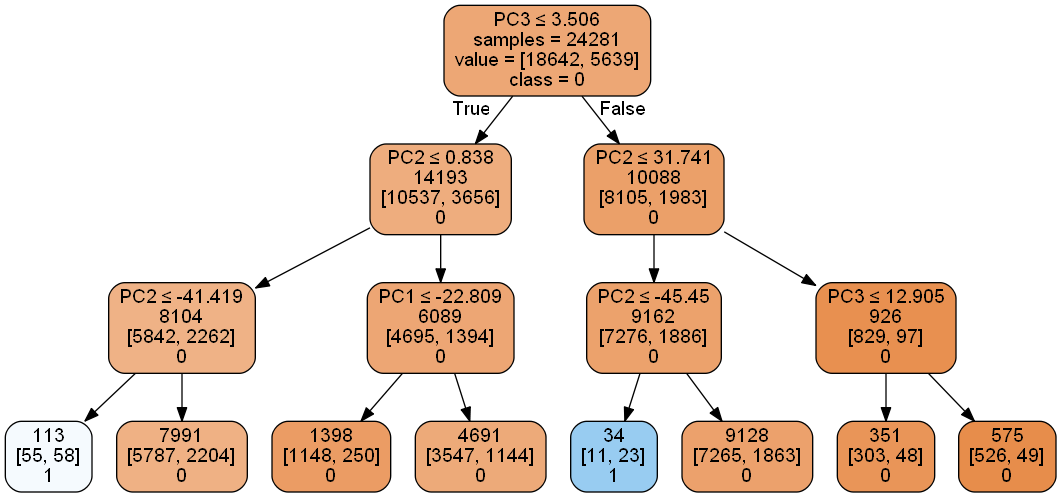

In [53]:
plotDecisionTree(dt1, feature_names=scores.columns, class_names=dt.classes_)

In [54]:
print("Accuracy:",accuracy_score(train_y, dt1.predict(scores)))
print("precision score: ", precision_score(train_y, dt1.predict(scores)))
print("recall score: ", recall_score(train_y, dt1.predict(scores)))
print("f1-score: ", f1_score(train_y, dt1.predict(scores)))

Accuracy: 0.7683785676042997
precision score:  0.5510204081632653
recall score:  0.014364248980315658
f1-score:  0.027998617352229523


In [55]:
logit = LogisticRegression(penalty="l2", solver='liblinear')
logit.fit(scores, train_y)

LogisticRegression(solver='liblinear')

In [56]:
print('intercept ', logit.intercept_[0])
print(pd.DataFrame({'coefficient': logit.coef_[0]}, index=scores.columns).sort_values('coefficient',ascending=False))
print()

intercept  -1.2127802116527215
     coefficient
PC4     0.001172
PC1     0.000365
PC2    -0.008213
PC3    -0.009898



In [57]:
print("Accuracy:",accuracy_score(train_y, logit.predict(scores)))
print("precision score: ", precision_score(train_y, logit.predict(scores)))
print("recall score: ", recall_score(train_y, logit.predict(scores)))
print("f1-score: ", f1_score(train_y, logit.predict(scores)))

Accuracy: 0.7677608006260038
precision score:  0.0
recall score:  0.0
f1-score:  0.0


C:\Users\winny\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Because of the poor performance of the PCA, we decided not to use this method to reduce the dimension.

# Model Selection: 
#### Although the accuracy seem to be higher using Decision tree model, the recall is higher using Naive Bayes, so we decided to use Naive Bayes model to predict our outcome 

# Evaluation

#### Based on the importance of the variables from the Naive Bayes model, we tried to use different combinations of predictors to train our model.

In [58]:
predictors1=train_df1[['max_voltage_day','working_days','chargecycles','cycle_time','total_off_time','piececount','number_times_restart']]
X_1 = pd.get_dummies(predictors1)
y_1 = train_df1['fail_7']

train_X_1, valid_X_1, train_y_1, valid_y_1 = train_test_split(X_1, y_1, test_size=0.4, random_state=1)

In [59]:
nb1 = GaussianNB()
nb1.fit(train_X_1, train_y_1)

predProb_train_1 = nb1.predict_proba(train_X_1)
predProb_valid_1 = nb1.predict_proba(valid_X_1)

# predict class membership
y_valid_pred_1 = nb1.predict(valid_X_1)
y_train_pred_1 = nb1.predict(train_X_1)

#training set
classificationSummary(train_y_1, nb1.predict(train_X_1))

print('\nAccuracy on train is', round(accuracy_score(train_y_1,y_train_pred_1),2))
print('Precision score on train is', round(precision_score(train_y_1,y_train_pred_1, pos_label = 1),2))
print('Recall score on train is', round(recall_score(train_y_1,y_train_pred_1, pos_label = 1),2))
print('F1 score on train is', round(f1_score(train_y_1,y_train_pred_1, pos_label = 1),2))

#test set
classificationSummary(valid_y_1, nb1.predict(valid_X_1))

print('\nAccuracy on test is', round(accuracy_score(valid_y_1,y_valid_pred_1),2))
print('Precision score on test is', round(precision_score(valid_y_1,y_valid_pred_1, pos_label = 1),2))
print('Recall score on test is', round(recall_score(valid_y_1,y_valid_pred_1, pos_label = 1),2))
print('F1 score on test is', round(f1_score(valid_y_1,y_valid_pred_1, pos_label = 1),2))

Confusion Matrix (Accuracy 0.7579)

       Prediction
Actual     0     1
     0 18225   417
     1  5461   178

Accuracy on train is 0.76
Precision score on train is 0.3
Recall score on train is 0.03
F1 score on train is 0.06
Confusion Matrix (Accuracy 0.7586)

       Prediction
Actual     0     1
     0 12157   272
     1  3636   123

Accuracy on test is 0.76
Precision score on test is 0.31
Recall score on test is 0.03
F1 score on test is 0.06


In [60]:

predictors2=train_df1[['max_voltage_day','working_days','chargecycles','cycle_time','total_off_time','charge_cycle_time_below_12']]
X_2 = pd.get_dummies(predictors2)
y_2 = train_df1['fail_7']

# split into training and validation
train_X_2, valid_X_2, train_y_2, valid_y_2 = train_test_split(X_2, y_2, test_size=0.4, random_state=1)


In [61]:
nb2 = GaussianNB()
nb2.fit(train_X_2, train_y_2)

predProb_train2 = nb2.predict_proba(train_X_2)
predProb_valid2 = nb2.predict_proba(valid_X_2)

# predict class membership
y_valid_pred2 = nb2.predict(valid_X_2)
y_train_pred2 = nb2.predict(train_X_2)

#training set
classificationSummary(train_y_2, nb2.predict(train_X_2))

print('\nAccuracy on train is', round(accuracy_score(train_y_2,y_train_pred2),2))
print('Precision score on train is', round(precision_score(train_y_2,y_train_pred2, pos_label = 1),2))
print('Recall score on train is', round(recall_score(train_y_2,y_train_pred2, pos_label = 1),2))
print('F1 score on train is', round(f1_score(train_y_2,y_train_pred2, pos_label = 1),2))

#test set
classificationSummary(valid_y_2, nb2.predict(valid_X_2))

print('\nAccuracy on test is', round(accuracy_score(valid_y_2,y_valid_pred2),2))
print('Precision score on test is', round(precision_score(valid_y_2,y_valid_pred2, pos_label = 1),2))
print('Recall score on test is', round(recall_score(valid_y_2,y_valid_pred2, pos_label = 1),2))
print('F1 score on test is', round(f1_score(valid_y_2,y_valid_pred2, pos_label = 1),2))

Confusion Matrix (Accuracy 0.7165)

       Prediction
Actual     0     1
     0 15395  3247
     1  3636  2003

Accuracy on train is 0.72
Precision score on train is 0.38
Recall score on train is 0.36
F1 score on train is 0.37
Confusion Matrix (Accuracy 0.7152)

       Prediction
Actual     0     1
     0 10218  2211
     1  2399  1360

Accuracy on test is 0.72
Precision score on test is 0.38
Recall score on test is 0.36
F1 score on test is 0.37


#### Although the accuracy goes up, the recall scores are much lower than keeping all the predictors we first use. So we decided to keep it as it is.

# Deployment

In [62]:
#Construct a new column 'working_days' calculated from the difference of the LastRecord and Date Deployed column, then drop
#these two columns
test_df['LastRecord']=pd.to_datetime(test_df['LastRecord'])
test_df['Date Deployed']=pd.to_datetime(test_df['Date Deployed'])
test_df['working_days']=test_df['LastRecord']-test_df['Date Deployed']
test_df['working_days']=test_df['working_days'].dt.days

test_df=test_df.drop(columns=['LastRecord','Date Deployed'])

In [63]:
predictor_column_name=predictors.columns

In [64]:
test_df_predictors=test_df[predictor_column_name]

In [65]:
test_df_predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   charging_rate_lag3          4500 non-null   float64
 1   charging_rate_lag7          4499 non-null   float64
 2   discharging_rate_lag3       4500 non-null   float64
 3   discharging_rate_lag7       4499 non-null   float64
 4   charge_cycle_time_below_12  4500 non-null   bool   
 5   discharging_rate_lag4       4500 non-null   float64
 6   discharging_rate_lag5       4500 non-null   float64
 7   discharging_rate_lag6       4500 non-null   float64
 8   discharging_rate_lag8       4498 non-null   float64
 9   charging_rate_lag4          4500 non-null   float64
 10  charging_rate_lag5          4500 non-null   float64
 11  charging_rate_lag6          4500 non-null   float64
 12  chargecycles                4500 non-null   float64
 13  total_off_time              4500 

#### There are a few null values in the dataframe, we will use median values of the columns to replace fill it.

In [66]:
test_df_predictors=test_df_predictors.fillna(test_df_predictors.median().iloc[0])

In [67]:
test_df_predictors = pd.get_dummies(test_df_predictors)

In [68]:
test_y = nb.predict(test_df_predictors)

In [69]:
test_df['fail_7'] = pd.DataFrame(test_y)

In [70]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 54 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   deviceid                     4500 non-null   int64  
 1   avg_time_charging_lag1       4500 non-null   float64
 2   avg_time_charging_lag2       4500 non-null   float64
 3   avg_time_charging_lag3       4500 non-null   float64
 4   avg_time_charging_lag7       4497 non-null   float64
 5   charging_rate_lag3           4500 non-null   float64
 6   charging_rate_lag7           4499 non-null   float64
 7   avg_time_discharging_lag1    4500 non-null   float64
 8   avg_time_discharging_lag2    4500 non-null   float64
 9   avg_time_discharging_lag3    4500 non-null   float64
 10  avg_time_discharging_lag7    4497 non-null   float64
 11  discharging_rate_lag3        4500 non-null   float64
 12  discharging_rate_lag7        4499 non-null   float64
 13  charge_cycle_time_

In [71]:
test_df['fail_7'].value_counts()

1    2338
0    2162
Name: fail_7, dtype: int64

#### Over half of the meters are predicted to fail in the next 7 days based on our model.

In [72]:
test_df.to_csv('test.csv',index=True)